In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [32]:
dataset=pd.read_csv("train.csv")


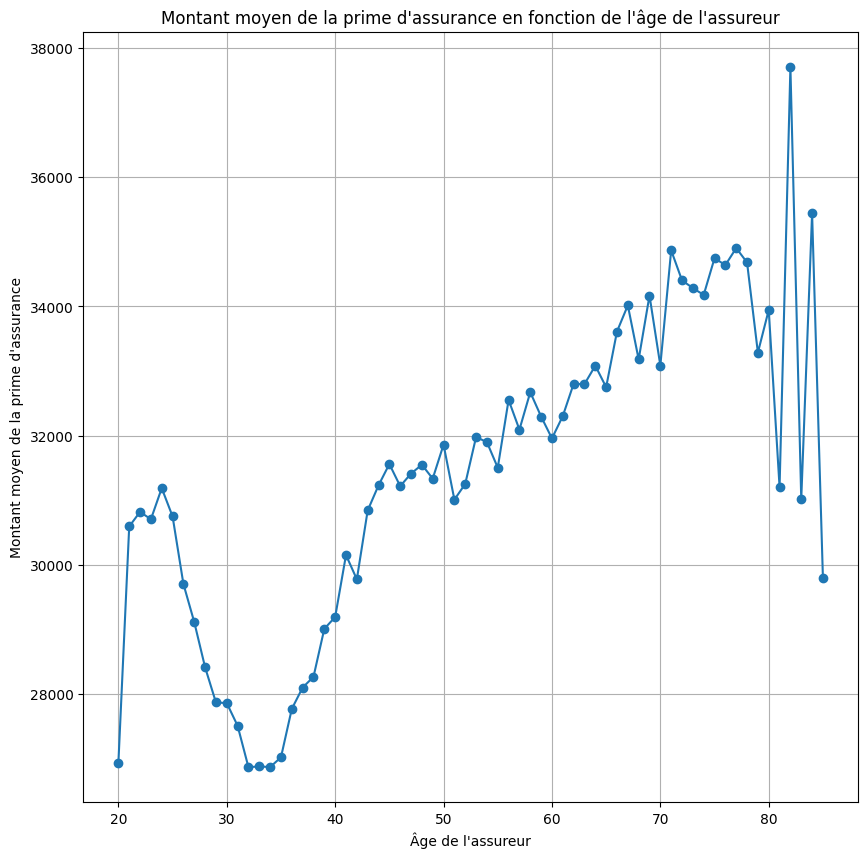

In [33]:
grouped_dataage = dataset.groupby('Age')['Annual_Premium'].mean()


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(grouped_dataage.index, grouped_dataage.values, marker='o', linestyle='-')
ax.set_ylabel('Montant moyen de la prime d\'assurance')
ax.set_title('Montant moyen de la prime d\'assurance en fonction de l\'âge de l\'assureur')
ax.set_xlabel('Âge de l\'assureur')
ax.grid(True)


C:\Users\José\AppData\Local\Temp\ipykernel_11460\811095414.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_data['Annual_Premium'], shade=True)


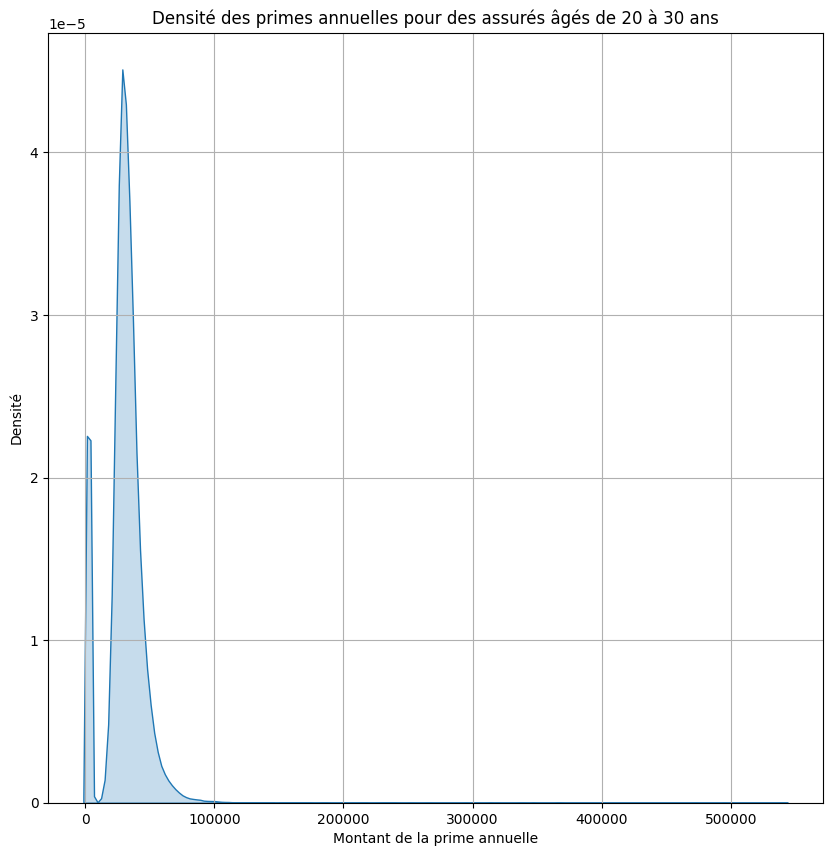

In [34]:
# Tracer la densité des primes annuelles


fig2,ax2=plt.subplots(1,1,figsize=(10,10))
filtered_data = dataset[(dataset['Age'] >= 20) & (dataset['Age'] <= 30)]

sns.kdeplot(filtered_data['Annual_Premium'], shade=True)
ax2.set_xlabel('Montant de la prime annuelle')
ax2.set_ylabel('Densité')
ax2.set_title('Densité des primes annuelles pour des assurés âgés de 20 à 30 ans')
ax2.grid(True)


In [35]:
dataset_encoded = pd.get_dummies(dataset, columns=["Gender", "Vehicle_Age", "Vehicle_Damage"]) 
dataset_encoded

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,False,False,True,False,True
1,2,76,1,3.0,0,33536.0,26.0,183,0,False,True,True,False,False,True,False
2,3,47,1,28.0,0,38294.0,26.0,27,1,False,True,False,False,True,False,True
3,4,21,1,11.0,1,28619.0,152.0,203,0,False,True,False,True,False,True,False
4,5,29,1,41.0,1,27496.0,152.0,39,0,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,30170.0,26.0,88,0,False,True,True,False,False,True,False
381105,381106,30,1,37.0,1,40016.0,152.0,131,0,False,True,False,True,False,True,False
381106,381107,21,1,30.0,1,35118.0,160.0,161,0,False,True,False,True,False,True,False
381107,381108,68,1,14.0,0,44617.0,124.0,74,0,True,False,False,False,True,False,True


In [36]:
dataset_encoded = dataset_encoded.iloc[:1000]

In [37]:
# Divisez l'ensemble de données en ensembles d'entraînement et de test

X = dataset_encoded.drop('Annual_Premium', axis=1)  # features
y = dataset_encoded['Annual_Premium']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisez un objet RandomForestClassifier avec les paramètres souhaités
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînez le modèle sur l'ensemble d'entraînement
rf_classifier.fit(X_train, y_train)

# Évaluez la performance du modèle sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

MemoryError: could not allocate 5455872 bytes